In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.signal import argrelmax
from os import listdir
from os.path import isfile, join
%matplotlib inline
import threading

import json

# add additional path to import scripts used in gui
import sys
sys.path.append('C:/Users/Experiment/PycharmProjects/PythonLab')

import hardware_modules.ZiControl as zi
import functions.ScanPhotodiode_DAQ as GalvoScan
import hardware_modules.PiezoController as pc
import functions.tracking as trk
from  hardware_modules.GalvoMirrors import SetGalvoPoint
# from  hardware_modules.PhotodiodeInput import ReadPhotodiode
import hardware_modules.PhotodiodeInput as PDIn



from time import localtime, strftime
import time
# file = './2015-05-21_20-32-29-5.8e-4Torr_NoPinhole_R100k.csv'
# folder = './'

import seaborn as sns

sns.set_style("")


timePerPt = 0.001

dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/VaryPiezoAmplitude/'
tag = 'Si3Ni4'

# Measure the full image

In [10]:
# =============================================
# =============================================
# set the initial scan range
# =============================================
rio_initial = {
        "xo": 0, 'yo': 0,
        "dx": 0.8, 'dy': 0.8,
        'xPts': 120, 'yPts': 120
    }



xVmin,xVmax,xPts,yVmin,yVmax,yPts = trk.rio_to_galvoparameter(rio_initial)

scanner = GalvoScan.ScanNV(xVmin,xVmax,xPts,yVmin,yVmax,yPts,timePerPt, canvas = None)

image_data = scanner.scan()

# set RoI

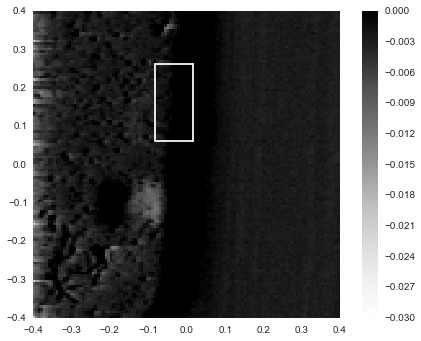

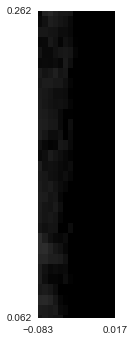

In [11]:
# =============================================
# =============================================
# display image 
# =============================================

# ---------------------------------------------
# adjust the color scale
clim_min, clim_max = -0.03, 0
# ---------------------------------------------

# ---------------------------------------------
# set region of interest

rio = {
        "xo": -0.035, 'yo': 0.165,
        "dx": 0.1, 'dy': 0.2,
        'xPts': 30, 'yPts': 60
    }

rio = {
        "xo": -0.033, 'yo': 0.162,
        "dx": 0.1, 'dy': 0.2,
        'xPts': 30, 'yPts': 60
    }
# ---------------------------------------------

# =============================================
# =============================================




# ---------------------------------------------
# show image
fig_overwiew = plt.figure()
ax = plt.subplot(1,1,1)


X, Y = np.meshgrid( np.linspace(xVmin,xVmax,xPts),  np.linspace(yVmin,yVmax,yPts))

p = plt.pcolor(X, Y, image_data)
# p = plt.imshow(image_data, interpolation="nearest")
plt.colorbar()
p.set_clim(clim_min, clim_max)
plt.xlim([xVmin, xVmax])
plt.ylim([yVmin, yVmax])

# plt.axes().set_aspect('equal')

plt.axes().set_aspect(abs((xVmax-xVmin) / (yVmax-yVmin)))
# print abs((xVmax-xVmin) / (yVmax-yVmin))
# ---------------------------------------------
# draw RIO
trk.plot_region(plt, rio, color = 'w')

#  plot close up
fig_RoI = plt.figure()
ax = plt.subplot(1,1,1)
p = plt.pcolor(X, Y, image_data)
# p = plt.imshow(image_data, interpolation="nearest")
# plt.colorbar()
p.set_clim(clim_min, clim_max)

rio_xVmin, rio_xVmax, rio_xPts, rio_yVmin, rio_yVmax, rio_yPts = trk.rio_to_galvoparameter(rio)

plt.xlim([rio_xVmin, rio_xVmax])
plt.ylim([rio_yVmin, rio_yVmax])
plt.axes().set_xticks([rio_xVmin, rio_xVmax])
plt.axes().set_yticks([rio_yVmin, rio_yVmax])

plt.axes().set_aspect(rio_yPts / rio_xPts)
plt.plot(rio['xo'], rio['yo'], 'x' , ms = 20)

# first measurement of RoI for reference of tracking

In [ ]:

# =============================================
# =============================================
# once we are happy with the RIO we start the tracking, first however save the image and the metadata
# =============================================
start_time = strftime("%Y-%m-%d_%H-%M-%S", localtime())

filename = '{:s}_{:s}'.format(start_time,tag)

fig_overwiew.savefig('{:s}/{:s}_Overview.png'.format(dirpath, filename))

with open('{:s}/{:s}_Overview.rio'.format(dirpath, filename), 'w') as outfile:
     json.dump(rio_initial, outfile, sort_keys = True, indent = 4, ensure_ascii=False)

<hardware_modules.GalvoMirrors.SetGalvoPoint instance at 0x0000000015367B48>

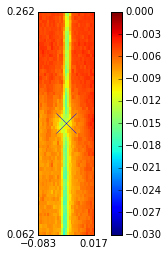

In [4]:
# =============================================
# =============================================
# once we are happy with the RIO we start the tracking, first however save the image and the metadata
# =============================================
start_time = strftime("%Y-%m-%d_%H-%M-%S", localtime())

filename = '{:s}_{:s}'.format(start_time,tag)

fig_overwiew.savefig('{:s}/{:s}_Overview.png'.format(dirpath, filename))

with open('{:s}/{:s}_Overview.rio'.format(dirpath, filename), 'w') as outfile:
     json.dump(rio_initial, outfile, sort_keys = True, indent = 4, ensure_ascii=False)
        

# =============================================
# =============================================
# take a first image of the RIO
# =============================================


# ---------------------------------------------
# scan RIO
rio_xVmin,rio_xVmax,rio_xPts,rio_yVmin,rio_yVmax,rio_yPts = trk.rio_to_galvoparameter(rio)
scanner = GalvoScan.ScanNV(rio_xVmin,rio_xVmax,rio_xPts,rio_yVmin,rio_yVmax,rio_yPts,timePerPt, canvas = None)
rio_image_data = scanner.scan()


# ---------------------------------------------
# show image

# fig = plt.figure(figsize=(20,10))


fig_RoI = plt.figure()
X, Y = np.meshgrid( np.linspace(rio_xVmin,rio_xVmax,rio_xPts),  np.linspace(rio_yVmin,rio_yVmax,rio_yPts))

p = plt.pcolor(X, Y, rio_image_data)
# p = plt.imshow(image_data, interpolation="nearest")
plt.colorbar()
p.set_clim(clim_min, clim_max)

plt.xlim([rio_xVmin, rio_xVmax])
plt.ylim([rio_yVmin, rio_yVmax])

plt.axes().set_aspect(rio_yPts / rio_xPts)
plt.plot(rio['xo'], rio['yo'], 'x' , ms = 20, mew = 0.5)
# plt.plot(rio['xo'], rio['yo'], 'circ' , ms = 20, mew = 2)
plt.axes().set_xticks([rio_xVmin, rio_xVmax])
plt.axes().set_yticks([rio_yVmin, rio_yVmax])
# save RIO image and data
counter = 0
filename = '{:s}_{:s}'.format(start_time,tag)
fig_RoI.savefig('{:s}/{:s}_RIO_{:03d}.png'.format(dirpath, filename, counter))
np.savetxt('{:s}/{:s}_RIO_{:03d}.csv'.format(dirpath, filename, counter), rio_image_data, fmt='%.18e', delimiter=',')

with open('{:s}/{:s}_RIO_{:03d}.rio'.format(dirpath, filename, counter), 'w') as outfile:
     json.dump(rio, outfile, sort_keys = True, indent = 4, ensure_ascii=False)
        
        
SetGalvoPoint(rio['xo'], rio['yo']) 

#  loop over different frequency ranges and piezo amplitudes, after each iteration correct for drifts

In [6]:
# ======================================================================
# set frequency range of full scan =====================================
# ======================================================================
freqStart = 1.8e6

freq_df = 2

interval_sampleNum = 5e3

counter_array = [9,13, 15]

# freqStart_array = [trk.get_frequency_interval(freqStart, interval_sampleNum, freq_df, n_block)[0] for n_block in counter_array]

amplitude_array = [0.0, 2.0, 1.0, 0.5]

[trk.get_frequency_interval(freqStart, interval_sampleNum, freq_df, n_block) for n_block in counter_array]

[(1890000.0, 1899998.0), (1930000.0, 1939998.0), (1950000.0, 1959998.0)]

In [7]:


# ======================================================================
# start script =========================================================
# ======================================================================

for amplitude in amplitude_array:
    for counter in counter_array:

        zi_parameter = {
            'amplitude' : amplitude,
            'offset' : 3.0,
            'freq' : 1e5,
            'ACCoupling' : 0, 
            'inChannel' : 0,
            'outChannel' : 0,
            'auxChannel': 0,
            'add' : 1,
            'range' : 1.0
        }


        full_filename = '{:s}/{:s}_{:03d}_amplitude_{:0.1f}V'.format(dirpath, filename, counter, amplitude)

        with open('{:s}.zi'.format(full_filename), 'w') as outfile:
            json.dump(zi_parameter, outfile, sort_keys = True, indent = 4, ensure_ascii=False)

        zi_hf2 = zi.ZIHF2(zi_parameter['amplitude'],
                          zi_parameter['offset'],
                          zi_parameter['freq'],
                          zi_parameter['ACCoupling'],
                          zi_parameter['inChannel'],
                          zi_parameter['outChannel'],
                          zi_parameter['auxChannel'],
                          zi_parameter['add'],
                          zi_parameter['range']
                         )



        # ========================================================================================
        # define new interval for sweep 
        interval_freqStart, interval_freqEnd = trk.get_frequency_interval(freqStart, interval_sampleNum, freq_df, counter)

        sweep_parameter = {
            'freqStart' : interval_freqStart,
            'freqEnd' : interval_freqEnd,
            'sampleNum' : interval_sampleNum,
            'samplesPerPt' : 8, 
            'xScale' : 0,
            'direction' : 0,
            'loopcount': 1,
            'timeout' : 1e8
        }

        with open('{:s}.sweep'.format(full_filename), 'w') as outfile:
            json.dump(sweep_parameter, outfile, sort_keys = True, indent = 4, ensure_ascii=False)


        print '{:s}\t sweeping\t {:03.3f} - {:03.3f}kHz'.format(
                strftime("%Y-%m-%d %H:%M:%S", localtime()),
                sweep_parameter['freqStart'] * 1e-3,
                sweep_parameter['freqEnd']* 1e-3)


        # ========================================================================================
        # set laser position
        SetGalvoPoint(rio['xo'], rio['yo']) 

        # ========================================================================================
        # look for mechanical resonance and save sweep data

        zi_hf2.sweep(sweep_parameter['freqStart'],
                     sweep_parameter['freqEnd'],
                     sweep_parameter['sampleNum'],
                     sweep_parameter['samplesPerPt'],
                     sweep_parameter['xScale'],
                     sweep_parameter['direction'],
                     sweep_parameter['loopcount'],
                     sweep_parameter['timeout']
                    )



        zi_hf2.writeData('{:s}.dat'.format(full_filename))

        # ========================================================================================
        # measure RoI
        rio_xVmin,rio_xVmax,rio_xPts,rio_yVmin,rio_yVmax,rio_yPts = trk.rio_to_galvoparameter(rio)
        scanner = GalvoScan.ScanNV(rio_xVmin,rio_xVmax,rio_xPts,rio_yVmin,rio_yVmax,rio_yPts,timePerPt, canvas = None)
        rio_image_data_new = scanner.scan()

        # ========================================================================================
        # compare to previous image and determine new RoI
        rio = trk.find_beam_position(rio_image_data, rio_image_data_new, rio)

        # ========================================================================================
        # overwrite data for next iteration
        rio_image_data = rio_image_data_new

        # ========================================================================================
        # create image of RoI
        fig_rio = plt.figure()
        X, Y = np.meshgrid( np.linspace(rio_xVmin,rio_xVmax,rio_xPts),  np.linspace(rio_yVmin,rio_yVmax,rio_yPts))

        p = plt.pcolor(X, Y, rio_image_data)
        # p = plt.imshow(image_data, interpolation="nearest")
        plt.colorbar()
        p.set_clim(clim_min, clim_max)

        plt.xlim([rio_xVmin, rio_xVmax])
        plt.ylim([rio_yVmin, rio_yVmax])

        plt.axes().set_aspect(rio_yPts / rio_xPts)
        plt.plot(rio['xo'], rio['yo'], 'x' , ms = 20)

        # ========================================================================================
        # save RoI data and image 
        filename = '{:s}_{:s}'.format(start_time,tag)
        fig_rio.savefig('{:s}.png'.format(full_filename))
        np.savetxt('{:s}.csv'.format(full_filename), rio_image_data, fmt='%.18e', delimiter=',')

        with open('{:s}.roi'.format(full_filename), 'w') as outfile:
            json.dump(rio, outfile, sort_keys = True, indent = 4, ensure_ascii=False)

        # ========================================================================================
        # close fig 
        plt.close(fig_rio)

        print '\t current laser position:\t  {:0.3f}\t {:0.3f}'.format(rio['xo'], rio['yo'])


autoConnect connected to a server on port 8005 using API level 1.
autoDetect selected the device dev35 for the measurement.
[['/dev35/sigins/0/imp50', 1], ['/dev35/sigins/0/ac', 0], ['/dev35/sigins/0/range', 0.0], ['/dev35/demods/0/order', 4], ['/dev35/demods/0/rate', 10000.0], ['/dev35/demods/0/harmonic', 1], ['/dev35/demods/0/phaseshift', 0], ['/dev35/sigouts/0/on', 1], ['/dev35/sigouts/0/range', 1.0], ['/dev35/sigouts/0/enables/6', 1], ['/dev35/sigouts/0/amplitudes/6', 0.0], ['/dev35/AUXOUTS/0/OFFSET', 3.0], ['/dev35/oscs/0/freq', 100000.0], ['/dev35/demods/0/oscselect', 0], ['/dev35/demods/0/adcselect', 0], ['/dev35/sigins/0/diff', 0], ['/dev35/sigouts/0/add', 1]]
2015-06-02 20:22:21	 sweeping	 1890.000 - 1899.998kHz
Will perform 1 sweeps....
Individual sweep 100.00% complete.   
sample contains 1 sweeps
	 current laser position:	  -0.033	 0.162
autoConnect connected to a server on port 8005 using API level 1.
autoDetect selected the device dev35 for the measurement.
[['/dev35/sigi

# just run sweep for different amplitudes, don't change laser position

In [7]:
fo = 1.94065e6
df = 300.

dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/Beam_4_Resonance_1.940MHz_VaryPiezoStrength/'
tag = 'Si3Ni4'

start_time = strftime("%Y-%m-%d_%H-%M-%S", localtime())
filename = '{:s}_{:s}'.format(start_time,tag) 

# ========================================================================================
# define new interval for sweep 
sweep_parameter = {
    'freqStart' : fo - df/2.,
    'freqEnd' : fo + df/2.,
    'sampleNum' : 151,
    'samplesPerPt' : 8, 
    'xScale' : 0,
    'direction' : 0,
    'loopcount': 1,
    'timeout' : 1e8
}


with open('{:s}.sweep'.format('{:s}/{:s}'.format(dirpath, filename)), 'w') as outfile:
    json.dump(sweep_parameter, outfile, sort_keys = True, indent = 4, ensure_ascii=False)

amplitude_array = [0.01,0.1,0.2, 0.4, 0.8, 1.0, 2.0, 4.0]

# ======================================================================
# start script =========================================================
# ======================================================================

for amplitude in amplitude_array:
    print 'current amplitude: {:0.2f}V'.format(amplitude)
    zi_parameter = {
        'amplitude' : amplitude,
        'offset' : amplitude + 1,
        'freq' : 1e5,
        'ACCoupling' : 0, 
        'inChannel' : 0,
        'outChannel' : 0,
        'auxChannel': 0,
        'add' : 1,
        'range' : 10**int(np.ceil(np.log10(amplitude)))
    }


    full_filename = '{:s}/{:s}_amplitude_{:0.1f}V'.format(dirpath, filename, amplitude)

    with open('{:s}.zi'.format(full_filename), 'w') as outfile:
        json.dump(zi_parameter, outfile, sort_keys = True, indent = 4, ensure_ascii=False)

    zi_hf2 = zi.ZIHF2(zi_parameter['amplitude'],
                      zi_parameter['offset'],
                      zi_parameter['freq'],
                      zi_parameter['ACCoupling'],
                      zi_parameter['inChannel'],
                      zi_parameter['outChannel'],
                      zi_parameter['auxChannel'],
                      zi_parameter['add'],
                      zi_parameter['range']
                     )


    # ========================================================================================
    # look for mechanical resonance and save sweep data

    zi_hf2.sweep(sweep_parameter['freqStart'],
                 sweep_parameter['freqEnd'],
                 sweep_parameter['sampleNum'],
                 sweep_parameter['samplesPerPt'],
                 sweep_parameter['xScale'],
                 sweep_parameter['direction'],
                 sweep_parameter['loopcount'],
                 sweep_parameter['timeout']
                )



    zi_hf2.writeData('{:s}.dat'.format(full_filename))



current amplitude: 0.01V
autoConnect connected to a server on port 8005 using API level 1.
autoDetect selected the device dev35 for the measurement.
[['/dev35/sigins/0/imp50', 1], ['/dev35/sigins/0/ac', 0], ['/dev35/sigins/0/range', 0.02], ['/dev35/demods/0/order', 4], ['/dev35/demods/0/rate', 10000.0], ['/dev35/demods/0/harmonic', 1], ['/dev35/demods/0/phaseshift', 0], ['/dev35/sigouts/0/on', 1], ['/dev35/sigouts/0/range', 0.01], ['/dev35/sigouts/0/enables/6', 1], ['/dev35/sigouts/0/amplitudes/6', 1.0], ['/dev35/AUXOUTS/0/OFFSET', 1.01], ['/dev35/oscs/0/freq', 100000.0], ['/dev35/demods/0/oscselect', 0], ['/dev35/demods/0/adcselect', 0], ['/dev35/sigins/0/diff', 0], ['/dev35/sigouts/0/add', 1]]
Will perform 1 sweeps....

sample contains 1 sweeps
current amplitude: 0.10V
autoConnect connected to a server on port 8005 using API level 1.
autoDetect selected the device dev35 for the measurement.
[['/dev35/sigins/0/imp50', 1], ['/dev35/sigins/0/ac', 0], ['/dev35/sigins/0/range', 0.2], ['/d

In [5]:
amplitude

0

In [4]:
10**int(np.ceil(np.log10(amplitude)))

OverflowError: cannot convert float infinity to integer

# OLD STUFF

In [ ]:
np.meshgrid([xVmin,xVmax])

p = plt.imshow(imageData, interpolation="nearest")

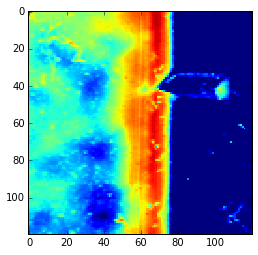

In [11]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
p = ax.imshow(imageData, interpolation="nearest")

p.set_clim(-0.2,0)

[10]
[2]
[17]
[10]
[ 6 12]
more than one minimum found: stop execution


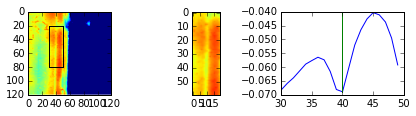

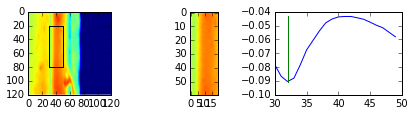

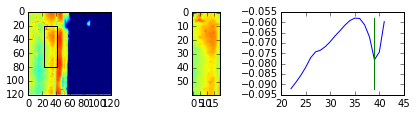

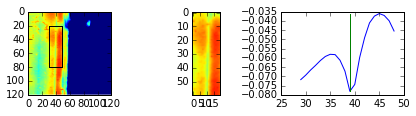

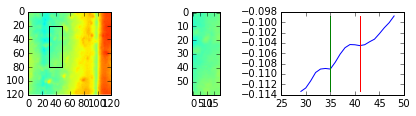

In [273]:






beam_pos_x, beam_pos_y = 40, 50
zoom_size = [20, 60]

for f in files:
    zoom_range = np.array([[beam_pos_x - zoom_size[0]/2, beam_pos_x + zoom_size[0]/2], 
                           [beam_pos_y - zoom_size[1]/2, beam_pos_y + zoom_size[1]/2]])
#     print zoom_range
    plt.figure()
    data = np.loadtxt(join(folder, f), delimiter=',')

    # data_zoom = np.flipud(data[zoom_range[1,0]:zoom_range[1,1], zoom_range[0,0]:zoom_range[0,1]])
    data_zoom = data[zoom_range[1,0]:zoom_range[1,1], zoom_range[0,0]:zoom_range[0,1]]
    data_avrg = np.mean(data_zoom.transpose(),1)

    tmp =  argrelmax(-data_avrg)[0]
    print tmp
    beam_pos_x = argrelmax(-data_avrg)[0] + beam_pos_x - zoom_size[0]/2

    
    
    # define arrangement of plots
    # gs = gridspec.GridSpec(2, 2,
    #                        width_ratios=[data.shape[1],data_zoom.shape[1]],
    #                        height_ratios=[1,1]
    #                        )
    # ax_avrg = plt.subplot(gs[1])
    # ax_all = plt.subplot(gs[2])
    # ax_zoom = plt.subplot(gs[3])

    gs = gridspec.GridSpec(1, 3,
                           height_ratios=[1,1,1]
                           )
    ax_avrg = plt.subplot(gs[2])
    ax_all = plt.subplot(gs[0])
    ax_zoom = plt.subplot(gs[1])
    # ax1 = plt.subplot(gs[0])


    p = ax_all.imshow(data)
    plot_region(ax_all, zoom_range, 'k')
    ax_all.set_xlim([0, data.shape[0]])
    ax_all.set_ylim([data.shape[1], 0 ])

    p.set_clim(-0.2,0)
    p = ax_zoom.imshow(data_zoom)
    p.set_clim(-0.2,0)



    ax_avrg.plot(np.arange(zoom_range[0,0], zoom_range[0,1]), data_avrg)
    ax_avrg.plot([beam_pos_x, beam_pos_x], [np.min(data_avrg), np.max(data_avrg)])


    plt.tight_layout()
    
    if len(beam_pos_x) > 1:
        print 'more than one minimum found: stop execution'
        break
    # plt.colorbar()

In [12]:
amplitude = 2
zi_parameter = {
    'amplitude' : amplitude,
    'offset' : amplitude + 1,
    'freq' : 1e5,
    'ACCoupling' : 0, 
    'inChannel' : 0,
    'outChannel' : 0,
    'auxChannel': 0,
    'add' : 1,
    'range' : 1.0 if amplitude <= 1.0 else 10
}


full_filename = '{:s}/{:s}_amplitude_{:0.1f}V'.format(dirpath, filename, amplitude)

with open('{:s}.zi'.format(full_filename), 'w') as outfile:
    json.dump(zi_parameter, outfile, sort_keys = True, indent = 4, ensure_ascii=False)

zi_hf2 = zi.ZIHF2(zi_parameter['amplitude'],
                  zi_parameter['offset'],
                  zi_parameter['freq'],
                  zi_parameter['ACCoupling'],
                  zi_parameter['inChannel'],
                  zi_parameter['outChannel'],
                  zi_parameter['auxChannel'],
                  zi_parameter['add'],
                  zi_parameter['range']
                 )
zi_parameter

autoConnect connected to a server on port 8005 using API level 1.
autoDetect selected the device dev35 for the measurement.
[['/dev35/sigins/0/imp50', 1], ['/dev35/sigins/0/ac', 0], ['/dev35/sigins/0/range', 4], ['/dev35/demods/0/order', 4], ['/dev35/demods/0/rate', 10000.0], ['/dev35/demods/0/harmonic', 1], ['/dev35/demods/0/phaseshift', 0], ['/dev35/sigouts/0/on', 1], ['/dev35/sigouts/0/range', 10], ['/dev35/sigouts/0/enables/6', 1], ['/dev35/sigouts/0/amplitudes/6', 2.0], ['/dev35/AUXOUTS/0/OFFSET', 3], ['/dev35/oscs/0/freq', 100000.0], ['/dev35/demods/0/oscselect', 0], ['/dev35/demods/0/adcselect', 0], ['/dev35/sigins/0/diff', 0], ['/dev35/sigouts/0/add', 1]]


{'ACCoupling': 0,
 'add': 1,
 'amplitude': 2,
 'auxChannel': 0,
 'freq': 100000.0,
 'inChannel': 0,
 'offset': 3,
 'outChannel': 0,
 'range': 10}

In [191]:

xVmin,xVmax,xPts,yVmin,yVmax,yPts = -0.4, 0.4, 120.,  -0.4, 0.4, 120.

array([10], dtype=int64)